In [ ]:
import numpy as np

#функция
def f(M):
  return np.exp(-((40-abs(M[0])-abs(M[1]))/((100+M[0]+M[1])**(1/2))))

def f_grad(x, y):
  a = 1 if x >= 0 else -1
  b = 1 if y >= 0 else -1
  return (a/(x + y + 100)**0.5 + 0.5*(-a*x - b*y + 40)/(x + y + 100)**1.5)*np.exp(-(-a*x - b*y + 40)/(x + y + 100)**0.5),          \
    (b/(x + y + 100)**0.5 + 0.5*(-a*x - b*y + 40)/(x + y + 100)**1.5)*np.exp(-(-a*x - b*y + 40)/(x + y + 100)**0.5)

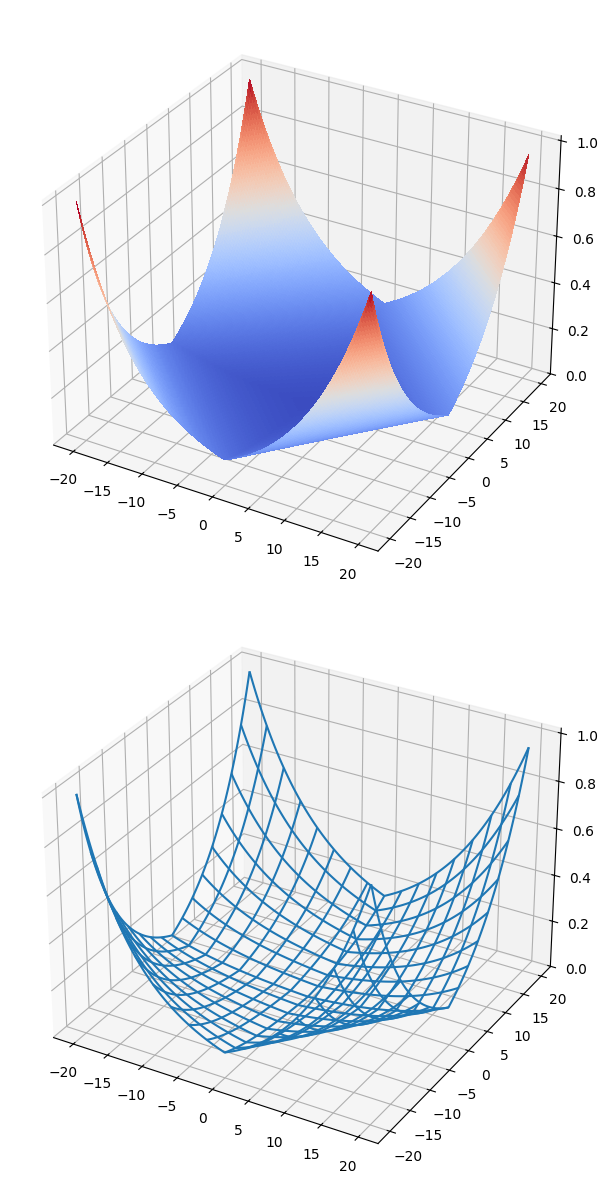

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm


from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})

X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X,Y])

ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax2.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.tight_layout()
plt.show()

In [ ]:
from logging import WARN
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

class GeneticAlgoritm():
  def __init__(self, f, population_size = 20, square_size = [-20, 20], selection = "tournament", parent = "panmixia", p = 0.1, itog = "True"):

    # selections: tournament, roulette, ranking, uniform_ranking, sigma_scaling
    # parent: "panmixia", "inbreeding", "outbreeding"

    self.population_size = population_size
    self.square_size = square_size
    self.selection = selection
    self.parent = parent
    self.p = p
    self.population = self.first_generation()
    self.itog = itog
    self.f = f

  # def f(M):
  #   return np.exp(-((40-abs(M[0])-abs(M[1]))/((100+M[0]+M[1])**(1/2))))

  # Генерация первого поколения
  def first_generation(self):
    population = []

    while len(population) < self.population_size:
        x = [random.uniform(self.square_size[0], self.square_size[1]), random.uniform(self.square_size[0], self.square_size[1])]

        x.append(f([x[0],x[1]]))
        if population.count(x) == 0:
            population.append(x)
    population.sort(key=f)
    population = np.array(population)
    return population

  # Отрисовка
  def draw(self):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    X = np.arange(self.square_size[0], self.square_size[1], 0.25)
    Y = np.arange(self.square_size[0], self.square_size[1], 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = f([X,Y])

    ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
    ax.scatter(self.population[:,0], self.population[:,1], self.population[:,2],color='black')

    plt.tight_layout()
    plt.show()

  # Мутация
  def rn(self, mu, sigma):
    r_n = random.normalvariate(mu, sigma)
    r = min(r_n, self.square_size[1]) if r_n > 0 else max (r_n, self.square_size[1])
    return r if random.random()>0.5 else random.uniform(self.square_size[0], self.square_size[1])

  # Турнирная селекция
  def tournament(self, generations):
    Mn = self.population[0]
    for _ in range(generations):
      self.p = 0.1 if _ == 0 else 0.05
      ### Блок отсечения предыдущей популяции tournament
      NW = np.array(self.population)[:(len(self.population)) // 2]
      ###
      self.population = NW
      L = list(NW)
      for i in range(len(self.population) // 2):
          parent1, parent2 = self.select_parents()
          l1 = [parent1[0] if random.random() > self.p else self.rn(parent1[0], 4),
                parent2[1] if random.random()> self.p else self.rn(parent2[1], 4)]
          l1.append(f(l1))
          l2 = [parent2[0] if random.random() > self.p else self.rn(parent2[0], 4),
                parent1[1] if random.random() > self.p else self.rn(parent1[1], 4)]
          l2.append(f(l2))
          L.append(np.array(l1))
          L.append(np.array(l2))
      L.sort(key=f)
      W = np.array(L)
      Mn = Mn if Mn[2]<=W[0,2] else W[0]
      self.population = W
      if self.itog == False:
        print(Mn)
        self.draw()
      elif self.itog and (_ + 1 == generations or _ == 0):
        print(Mn)
        self.draw()

  # Рулетная селекция
  def roulette(self, generations):
    Mn = self.population[0]
    for _ in range(generations):
      self.p = 0.1 if _ == 0 else 0.05
      ### Блок отсечения предыдущей популяции roulette
      epsilon = 1e-10
      probs = [ (1.0 / (self.population[i][2] + epsilon)) for i in range(len(self.population))]
      probs /= sum(probs)
      NW_indx = np.random.choice(len(self.population), size = (len(self.population) // 2), replace = False, p=probs)
      NW = self.population[NW_indx]
      ###
      self.population = NW
      L = list(NW)
      for i in range(len(self.population) // 2):
          parent1, parent2 = self.select_parents()
          l1 = [parent1[0] if random.random() > self.p else self.rn(parent1[0], 4),
                parent2[1] if random.random()> self.p else self.rn(parent2[1], 4)]
          l1.append(f(l1))
          l2 = [parent2[0] if random.random() > self.p else self.rn(parent2[0], 4),
                parent1[1] if random.random() > self.p else self.rn(parent1[1], 4)]
          l2.append(f(l2))
          L.append(np.array(l1))
          L.append(np.array(l2))
      L.sort(key=f)
      W = np.array(L)
      Mn = Mn if Mn[2]<=W[0,2] else W[0]
      self.population = W
      if self.itog == False:
        print(Mn)
        self.draw()
      elif self.itog and (_ + 1 == generations or _ == 0):
        print(Mn)
        self.draw()

  # Ранжирование
  def ranking(self, generations):
    Mn = self.population[0]
    for _ in range(generations):
      self.p = 0.1 if _ == 0 else 0.05
      ### Блок отсечения предыдущей популяции ranking
      ranks = np.arange(len(self.population), 0, -1)
      probs = ranks / ranks.sum()
      NW_indx = np.random.choice(len(self.population), size = (len(self.population) // 2), replace = False, p=probs)
      NW = self.population[NW_indx]
      ###
      self.population = NW
      L = list(NW)
      for i in range(len(self.population) // 2):
          parent1, parent2 = self.select_parents()
          l1 = [parent1[0] if random.random() > self.p else self.rn(parent1[0], 4),
                parent2[1] if random.random()> self.p else self.rn(parent2[1], 4)]
          l1.append(f(l1))
          l2 = [parent2[0] if random.random() > self.p else self.rn(parent2[0], 4),
                parent1[1] if random.random() > self.p else self.rn(parent1[1], 4)]
          l2.append(f(l2))
          L.append(np.array(l1))
          L.append(np.array(l2))
      L.sort(key=f)
      W = np.array(L)
      Mn = Mn if Mn[2]<=W[0,2] else W[0]
      self.population = W
      if self.itog == False:
        print(Mn)
        self.draw()
      elif self.itog and (_ + 1 == generations or _ == 0):
        print(Mn)
        self.draw()

  # Равномерное ранжирование
  def uniform_ranking(self, generations):
    Mn = self.population[0]
    for _ in range(generations):
      self.p = 0.1 if _ == 0 else 0.05
      ### Блок отсечения предыдущей популяции uniform_ranking
      half = len(self.population)//2
      first_half = self.population[:half]  # Более приспособленные (первая половина)
      second_half = self.population[half:]  # Менее приспособленные (вторая половина)

      # Назначаем вероятности
      first_prob = 0.9  # Высокая вероятность для более приспособленных
      second_prob = 0.1

      probs = np.zeros(len(self.population))
      probs[:half] = first_prob / half
      probs[half:] = second_prob / half

      probs /= sum(probs)

      NW_indx = np.random.choice(len(self.population), size = (len(self.population) // 2), replace = False, p=probs)
      NW = self.population[NW_indx]
      #NW = np.array(self.population)[:(len(self.population)) // 2]
      ###
      self.population = NW
      L = list(NW)
      for i in range(len(self.population) // 2):
          parent1, parent2 = self.select_parents()
          l1 = [parent1[0] if random.random() > self.p else self.rn(parent1[0], 4),
                parent2[1] if random.random()> self.p else self.rn(parent2[1], 4)]
          l1.append(f(l1))
          l2 = [parent2[0] if random.random() > self.p else self.rn(parent2[0], 4),
                parent1[1] if random.random() > self.p else self.rn(parent1[1], 4)]
          l2.append(f(l2))
          L.append(np.array(l1))
          L.append(np.array(l2))
      L.sort(key=f)
      W = np.array(L)
      Mn = Mn if Mn[2]<=W[0,2] else W[0]
      self.population = W
      if self.itog == False:
        print(Mn)
        self.draw()
      elif self.itog and (_ + 1 == generations or _ == 0):
        print(Mn)
        self.draw()

  # Сигма-сечение
  def sigma_scaling(self, generations):
    Mn = self.population[0]
    for _ in range(generations):
      self.p = 0.1 if _ == 0 else 0.05
      ### Блок отсечения предыдущей популяции Сигма-сечение
      f_values = [self.population[i][2] for i in range(len(self.population))]
      f_avg = np.mean(f_values)

      sigma = np.std(f_values)
      epsilon = 1e-10
      F_values = 1 + (f_avg - f_values) / (2 * sigma + epsilon) # Масштабируем значения f

      F_values = np.exp(F_values)

      probs = F_values / sum(F_values)

      NW_indx = np.random.choice(len(self.population), size = (len(self.population) // 2), replace = False, p=probs)
      NW = self.population[NW_indx]
      ###
      self.population = NW
      L = list(NW)
      for i in range(len(self.population) // 2):
          parent1, parent2 = self.select_parents()
          l1 = [parent1[0] if random.random() > self.p else self.rn(parent1[0], 4),
                parent2[1] if random.random()> self.p else self.rn(parent2[1], 4)]
          l1.append(f(l1))
          l2 = [parent2[0] if random.random() > self.p else self.rn(parent2[0], 4),
                parent1[1] if random.random() > self.p else self.rn(parent1[1], 4)]
          l2.append(f(l2))
          L.append(np.array(l1))
          L.append(np.array(l2))
      L.sort(key=f)
      W = np.array(L)
      Mn = Mn if Mn[2]<=W[0,2] else W[0]
      self.population = W
      if self.itog == False:
        print(Mn)
        self.draw()
      elif self.itog and (_ + 1 == generations or _ == 0):
        print(Mn)
        self.draw()


  def select_parents(self):
    if self.parent == "panmixia":
      return self.panmixia()
    elif self.parent == "inbreeding":
      return self.inbreeding()
    else:
      return self.outbreeding()

  def panmixia(self):
    parent1 = random.choice(self.population)
    parent2 = random.choice(self.population)
    return parent1, parent2

  def inbreeding(self):
    parent1 = random.choice(self.population)
    # Находим наиболее похожего родителя
    parent2 = min(self.population, key=lambda x: np.linalg.norm(x - parent1))
    return parent1, parent2

  def outbreeding(self):
    parent1 = random.choice(self.population)
    # Находим наименее похожего родителя
    parent2 = max(self.population, key=lambda x: np.linalg.norm(x - parent1))
    return parent1, parent2


  def train(self, generations = 100):
    if self.selection == "tournament":
      self.tournament(generations)
    elif self.selection == "roulette":
      self.roulette(generations)
    elif self.selection == "ranking":
      self.ranking(generations)
    elif self.selection == "uniform_ranking":
      self.uniform_ranking(generations)
    else:
      self.sigma_scaling(generations)


-------------------------------------------------------

Selection: tournament	Parent: panmixia
[-3.01115796 -1.2345263   0.02589157]


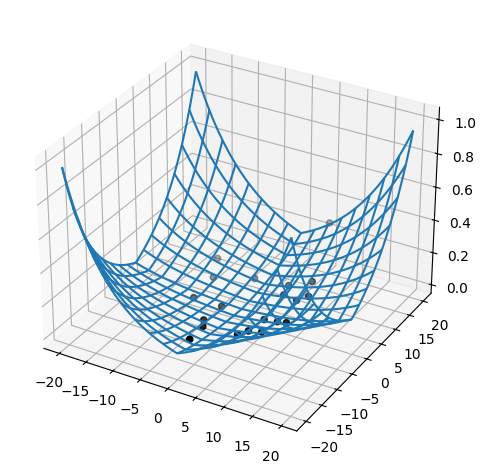

[-0.02919047  0.00686992  0.01837361]


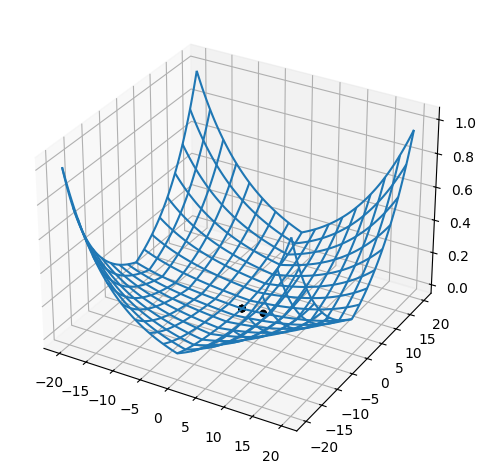

-------------------------------------------------------

Selection: roulette	Parent: panmixia
[-0.20789387  0.51930352  0.01981771]


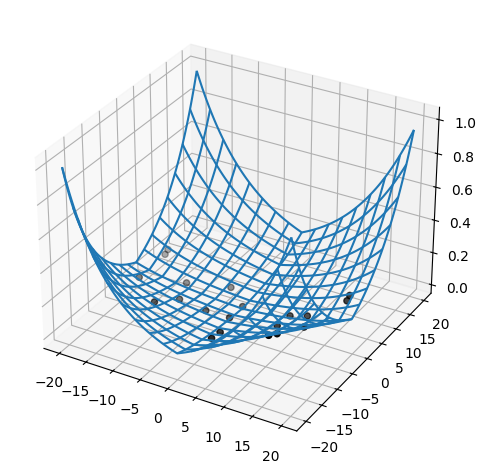

[-0.20789387  0.00599541  0.01863649]


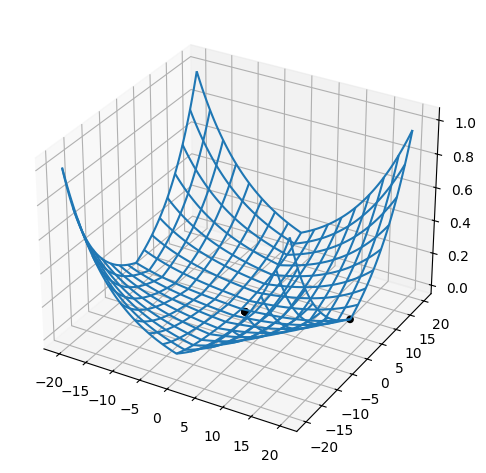

-------------------------------------------------------

Selection: ranking	Parent: panmixia
[0.80585874 4.59387801 0.0343817 ]


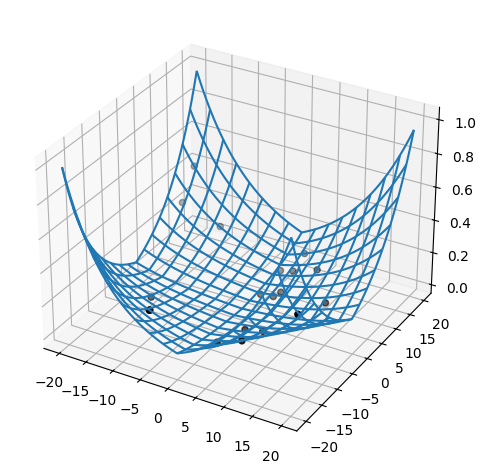

[0.05965251 0.03430096 0.0185232 ]


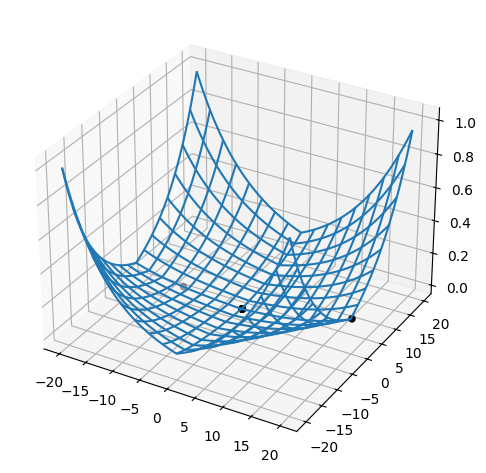

-------------------------------------------------------

Selection: uniform_ranking	Parent: panmixia
[5.4787062  0.93143791 0.03853295]


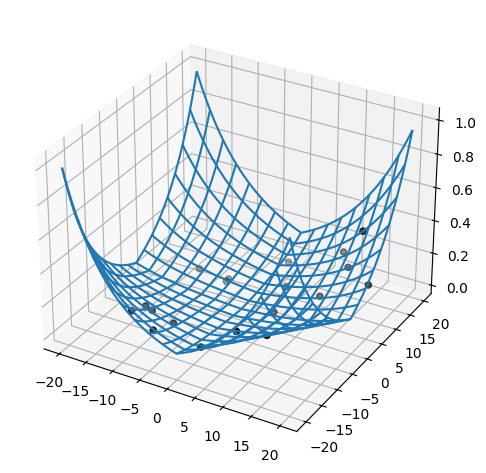

[-0.02020645  0.02179664  0.01839332]


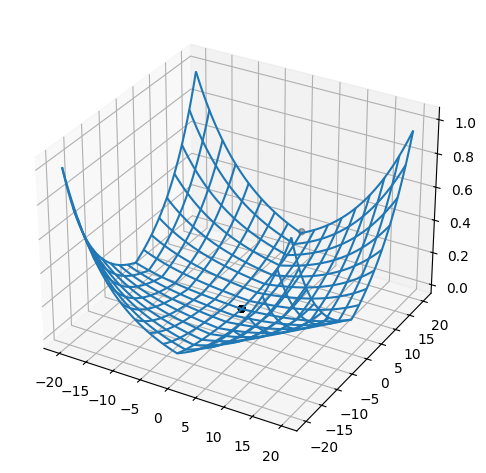

-------------------------------------------------------

Selection: sigma_scaling	Parent: panmixia
[ 1.84529148 -9.31038101  0.04986058]


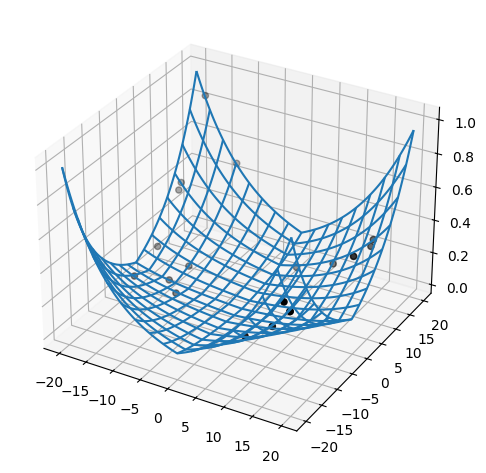

[-0.088585    0.02503162  0.01850145]


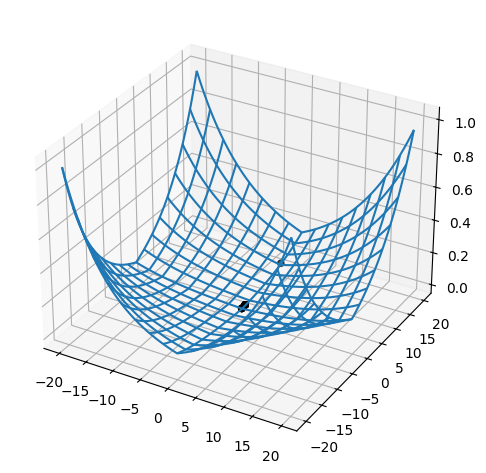

In [ ]:
selections = ["tournament", "roulette", "ranking", "uniform_ranking", "sigma_scaling"]
parents = ["panmixia"]
def f(M):
  return np.exp(-((40-abs(M[0])-abs(M[1]))/((100+M[0]+M[1])**(1/2))))

for sl in selections:
  for pr in parents:
    print("-------------------------------------------------------\n")
    print(f"Selection: {sl}\tParent: {pr}")
    a = GeneticAlgoritm(f = f, population_size=20 ,selection = sl, parent=pr, itog = True)
    a.train(1000)

[-0.93556075 -0.22706516  0.02011051]


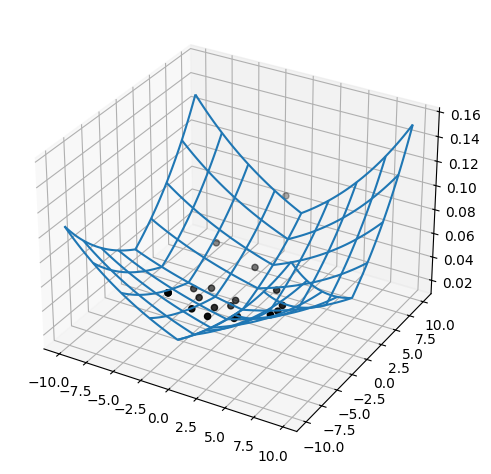

[-0.93556075 -0.22706516  0.02011051]


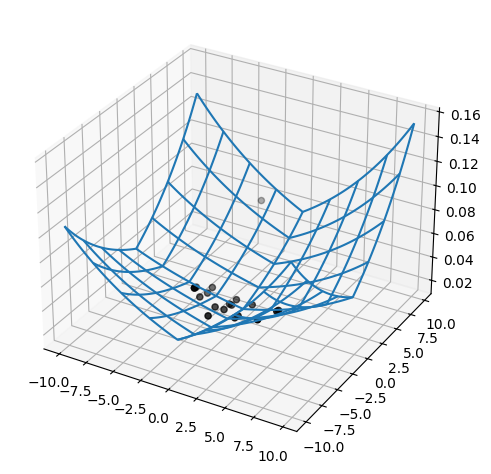

[ 0.52097915 -0.22706516  0.01985221]


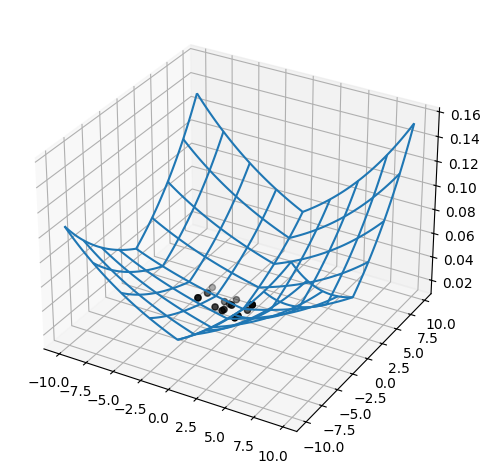

[ 0.52097915 -0.22706516  0.01985221]


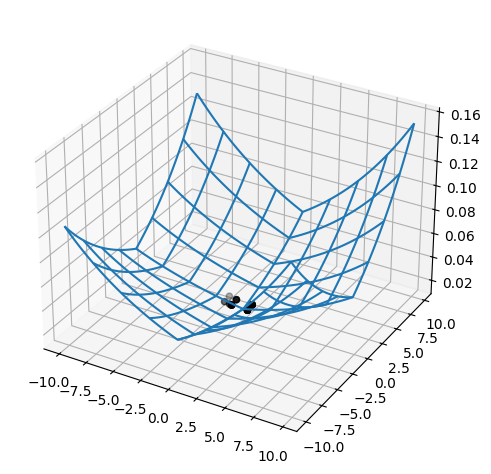

[ 0.52097915 -0.22706516  0.01985221]


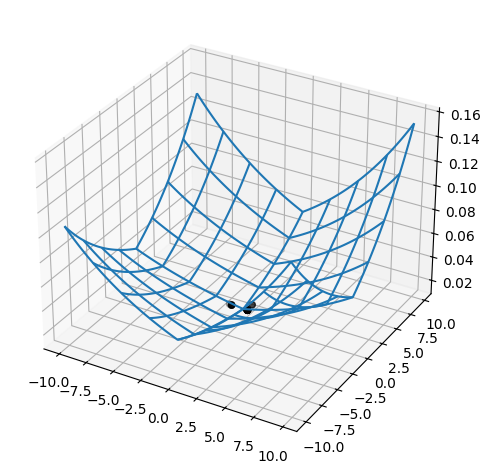

[ 0.52097915 -0.22706516  0.01985221]


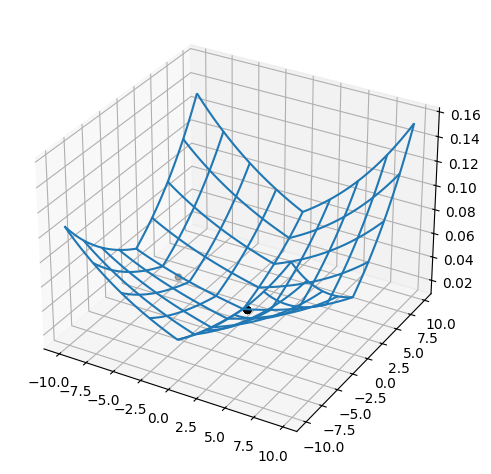

[ 0.52097915 -0.22706516  0.01985221]


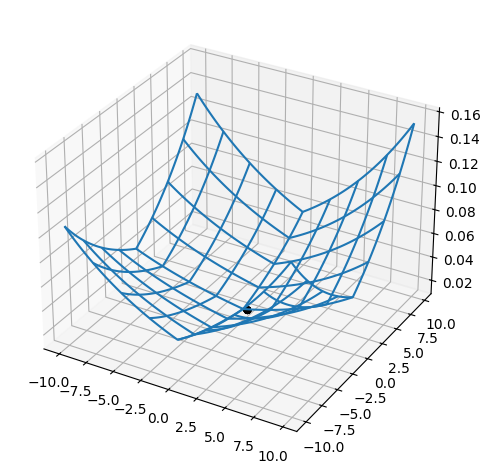

[ 0.52097915 -0.22706516  0.01985221]


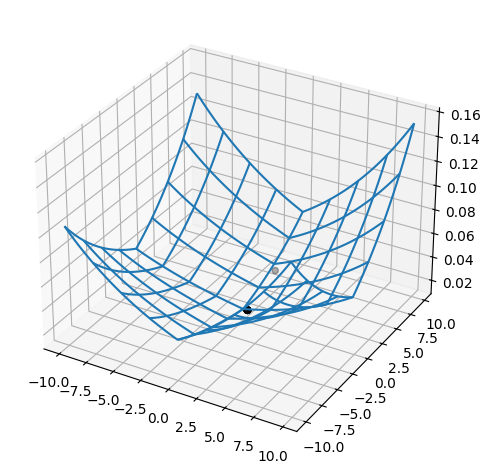

[ 0.52097915 -0.22706516  0.01985221]


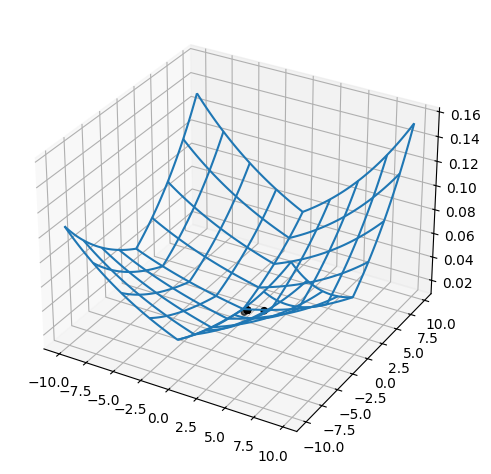

[ 0.52097915 -0.22706516  0.01985221]


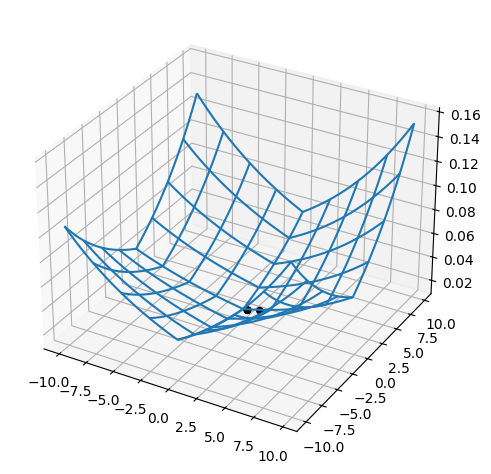

[ 0.52097915 -0.22706516  0.01985221]


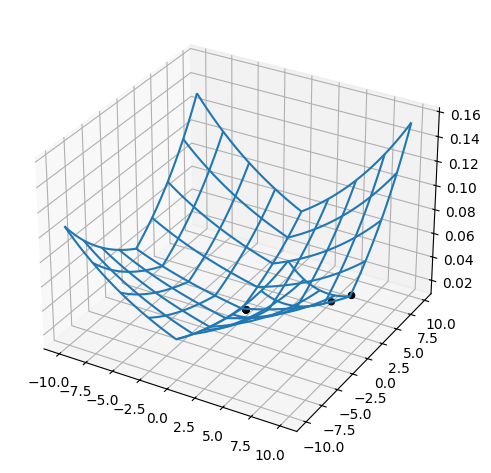

[ 0.52097915 -0.22706516  0.01985221]


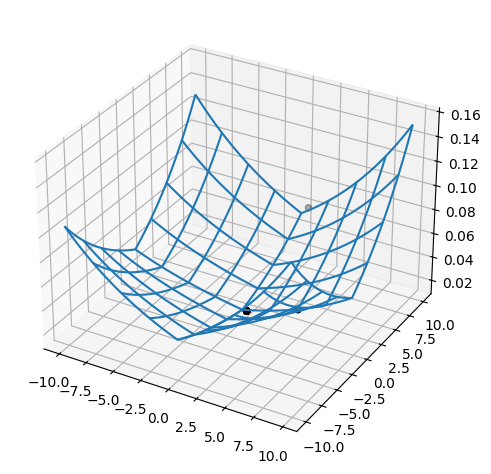

[ 0.52097915 -0.22706516  0.01985221]


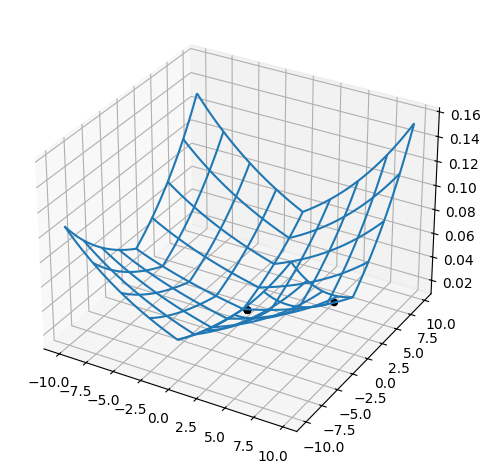

[ 0.52097915 -0.22706516  0.01985221]


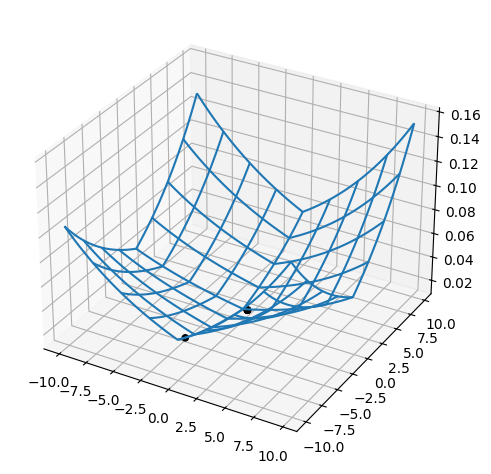

[ 0.52097915 -0.22706516  0.01985221]


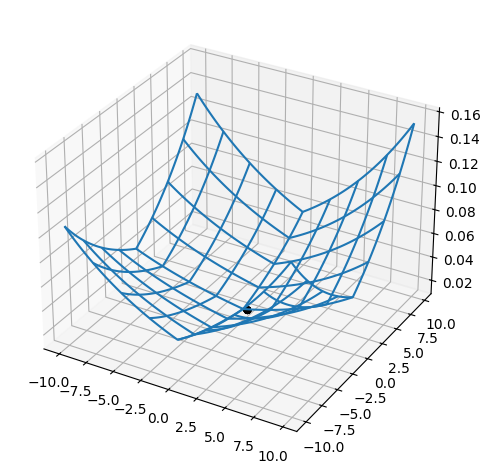

[ 0.52097915 -0.22706516  0.01985221]


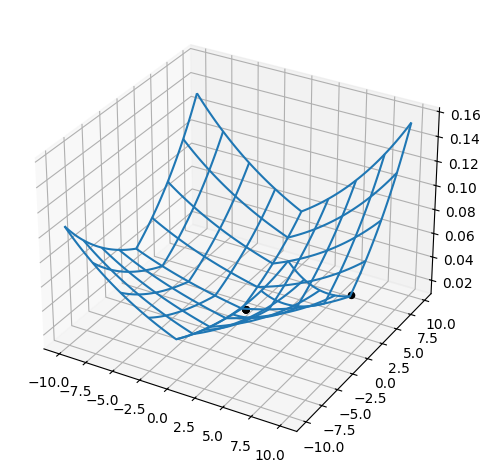

[ 0.52097915 -0.22706516  0.01985221]


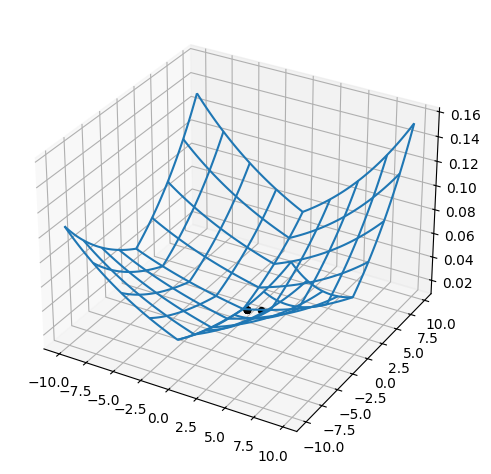

[ 0.52097915 -0.22706516  0.01985221]


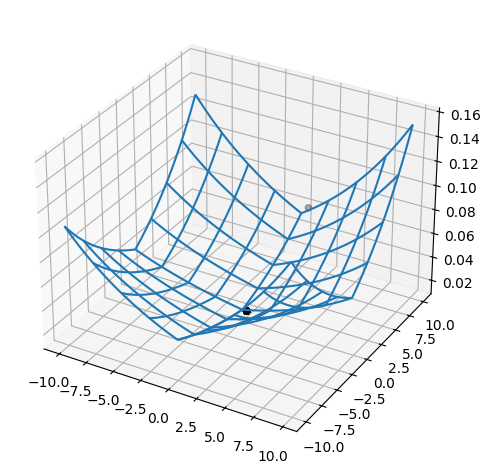

[ 0.52097915 -0.22706516  0.01985221]


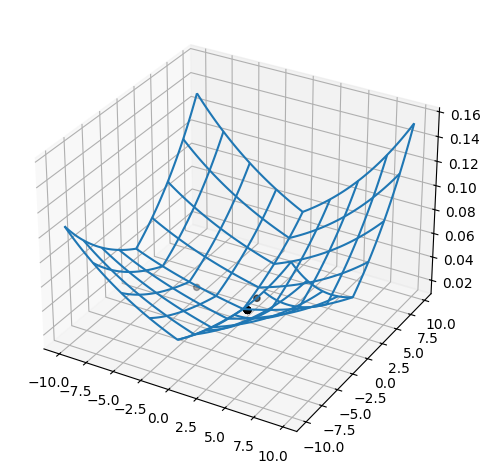

[ 0.52097915 -0.22706516  0.01985221]


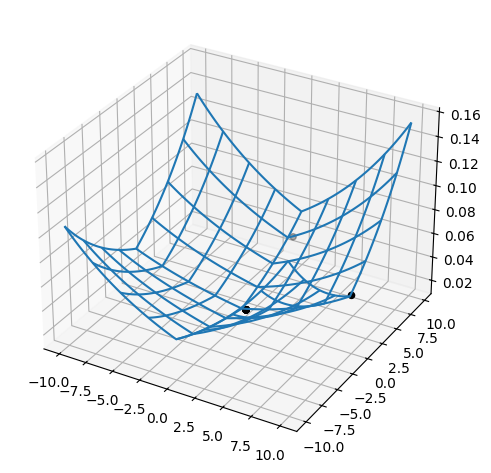

In [ ]:
a = GeneticAlgoritm(f, population_size=20  ,selection = "tournament", parent="panmixia", itog = False, square_size=[-10, 10])
a.train(20)

[-1.37392499  1.13701551  0.02343899]


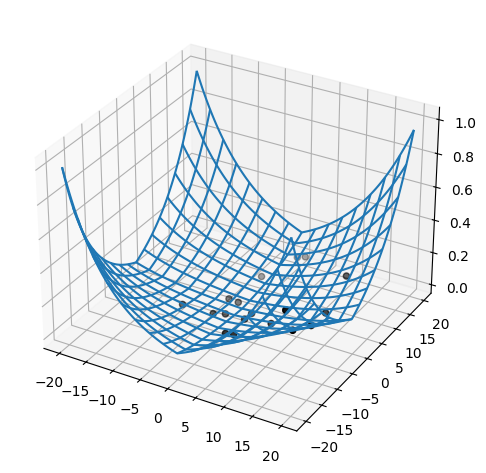

[0.00031126 0.00020789 0.01831678]


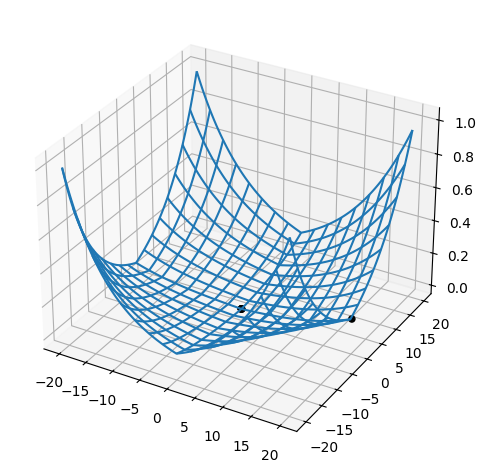

In [ ]:
a = GeneticAlgoritm(f, population_size=20  ,selection = "tournament", parent="panmixia", itog = True)
a.train(100000)